# Code on Hermite polynomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import genlaguerre
import cmath


In [2]:
print("Enter the value of m and n:")
n=int(input())
m=int(input())


Enter the value of m and n:
6
0


In [3]:
def chif(r,theta):
    beta=4
    z=complex(math.cos(m*theta),-math.sin(m*theta))
    a=int((n-abs(m))/2)
    b=int((n+abs(m))/2)
    chi1=(math.pow(-1,a))/(math.pow(beta,abs(m)+1))
    chi2= math.sqrt(math.factorial(a)/ (np.pi * math.factorial(b)))
    chi3= math.pow(r,abs(m))  * math.exp((math.pow(-r,2))/(2 * math.pow(beta,2))) * z
    chi4= genlaguerre(a,abs(m))(math.pow(r,2)/math.pow(beta,2))
    chi= chi1*chi2*chi3*chi4
    return chi


In [4]:
r= np.linspace(0,1,100)
theta= np.linspace(0, 2*(np.pi),100)



In [11]:
R, THETA = np.meshgrid(r, theta)

In [12]:
f2 = np.vectorize(chif)

In [13]:
Z= f2(R, THETA)

In [14]:
Z

array([[-0.1410474 +0.j, -0.14104515+0.j, -0.1410384 +0.j, ...,
        -0.11996073+0.j, -0.11952536+0.j, -0.1190856 +0.j],
       [-0.1410474 +0.j, -0.14104515+0.j, -0.1410384 +0.j, ...,
        -0.11996073+0.j, -0.11952536+0.j, -0.1190856 +0.j],
       [-0.1410474 +0.j, -0.14104515+0.j, -0.1410384 +0.j, ...,
        -0.11996073+0.j, -0.11952536+0.j, -0.1190856 +0.j],
       ...,
       [-0.1410474 +0.j, -0.14104515+0.j, -0.1410384 +0.j, ...,
        -0.11996073+0.j, -0.11952536+0.j, -0.1190856 +0.j],
       [-0.1410474 +0.j, -0.14104515+0.j, -0.1410384 +0.j, ...,
        -0.11996073+0.j, -0.11952536+0.j, -0.1190856 +0.j],
       [-0.1410474 +0.j, -0.14104515+0.j, -0.1410384 +0.j, ...,
        -0.11996073+0.j, -0.11952536+0.j, -0.1190856 +0.j]])

In [15]:
real_Z = Z.real
real_Z

array([[-0.1410474 , -0.14104515, -0.1410384 , ..., -0.11996073,
        -0.11952536, -0.1190856 ],
       [-0.1410474 , -0.14104515, -0.1410384 , ..., -0.11996073,
        -0.11952536, -0.1190856 ],
       [-0.1410474 , -0.14104515, -0.1410384 , ..., -0.11996073,
        -0.11952536, -0.1190856 ],
       ...,
       [-0.1410474 , -0.14104515, -0.1410384 , ..., -0.11996073,
        -0.11952536, -0.1190856 ],
       [-0.1410474 , -0.14104515, -0.1410384 , ..., -0.11996073,
        -0.11952536, -0.1190856 ],
       [-0.1410474 , -0.14104515, -0.1410384 , ..., -0.11996073,
        -0.11952536, -0.1190856 ]])

# Code - polar & cartesian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, abs, angle
import math
from scipy.special import genlaguerre
import cmath

In [2]:
a = np.array([[1, 2, 3],[4, 5, 6], [7, 8, 9]])

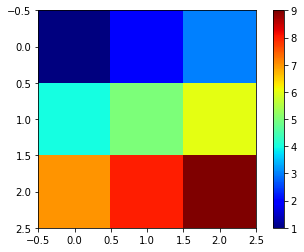

In [3]:
plt.imshow(a, cmap ='jet')
plt.colorbar()

In [11]:
a_fl = np.flip(a, 1)

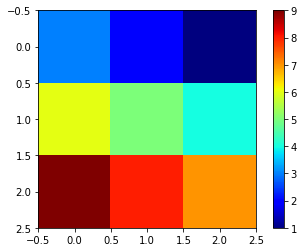

In [12]:
plt.imshow(a_fl, cmap ='jet')
plt.colorbar()

In [65]:
# Written for square images with odd pixel length and breadth for trial
# This function will return value at position taking centre of image as origin

def val_at_pos(image, x,y):
    dim_x, dim_y = image.shape
    mid = int((dim_x-1)/2)
    X=mid-y
    Y=x+mid
    return image[X][Y]

In [75]:
val_at_pos(a,1,-1) # input is cartesian (x,y)

9

###### Trying to take (r, theta) values now

In [76]:
# For any given value of (r,theta) this gives (x,y) coordinates

def pol2car(r_, theta_):
    X = np.round(r_*np.cos(theta_)).astype(int)
    Y = np.round(r_*np.sin(theta_)).astype(int)
    return(X,Y)

In [88]:
pol2car(1,np.pi/4)

(1, 1)

#### f(r, theta)

In [89]:
# This gives pixel values for a given (r, theta) value taking image centre as the origin 

def f_r_theta (image_, r_, theta_):
    (x_, y_) = pol2car(r_, theta_)
    pix_val = val_at_pos(image_, x_,y_)
    return pix_val

In [97]:
f_r_theta(a, 1, np.pi/4)

3

#### Constructing f(r, theta) array

In [121]:
r_max = float(input("Enter r-range from 0 to "))
r_points = int(input("Enter no. of points in r: "))
theta_max = 2*np.pi
theta_points = int(input("Enter no. of points in theta: "))

Enter r-range from 0 to 1
Enter no. of points in r: 99
Enter no. of points in theta: 99


In [122]:
r= np.linspace(0,r_max,r_points)
theta= np.linspace(0, theta_max,theta_points)

In [131]:
image_pol_arr = np.zeros((len(r), len(r)))

In [134]:
image_pol_arr.shape

(99, 99)

In [146]:
my_image = a

array_dir_r = 0
array_dir_theta = 0

for array_dir_theta in range(0, len(theta)):
    for array_dir_r in range(0, len(r)):
        image_pol_arr [array_dir_r][array_dir_theta] = f_r_theta(my_image, r[array_dir_r], theta[array_dir_theta])


<ipython-input-151-0f555eb2f3cb>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm0 = ax.pcolormesh(theta, r, image_pol_arr, cmap = 'jet')#, vmin = -0.001, vmax = 0.001)


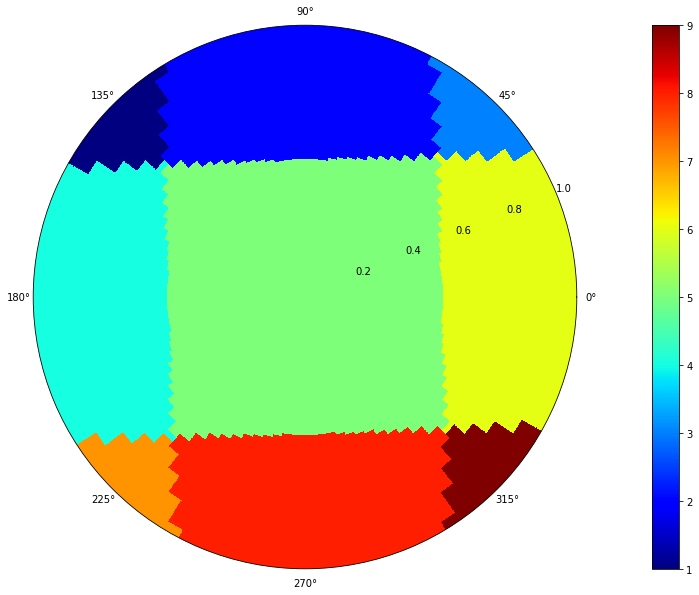

In [151]:
fig, ax = plt.subplots(1, 1, figsize = (27,10), subplot_kw = {'projection': 'polar'})
pcm0 = ax.pcolormesh(theta, r, image_pol_arr, cmap = 'jet')#, vmin = -0.001, vmax = 0.001) 

fig.colorbar(pcm0, ax = ax)